In [8]:
from __future__ import annotations

In [9]:
import sys
sys.path.append('/Users/alex/Desktop/CS/Internships/DBF/python_tools/')
from util.blackbox import decode_blackbox

In [10]:
import zipfile
import pandas as pd
import os
from io import StringIO
import matplotlib.pyplot as plt

In [11]:
MAIN_DIR = "/Users/alex/Desktop/CS/Internships/DBF/python_tools/data/thrustStand/01_19_2024"
LOGS_DIR = MAIN_DIR + "/LOGS"
THRUST_ZIP = MAIN_DIR + "/THRUST.zip"

In [12]:
log_dfs: dict[str, pd.DataFrame] = dict()

for filename in os.listdir(LOGS_DIR):
    f = os.path.join(LOGS_DIR, filename)
    
    name = f.split('/')[-1].split('.')[0]

    log_dfs[name] = decode_blackbox(f)


Log 1 of 1, start 01:01.254, end 01:19.278, duration 00:18.023

Statistics
Looptime           1001 avg            1.8 std dev (0.2%)
I frames     563  105.8 bytes avg    59587 bytes total
P frames    8418   72.6 bytes avg   611265 bytes total
E frames       2    7.0 bytes avg       14 bytes total
S frames     245   41.5 bytes avg    10160 bytes total
Frames      8981   74.7 bytes avg   670852 bytes total
Data rate  498Hz  38052 bytes/s     380600 baud

3 frames failed to decode, rendering 15 loop iterations unreadable. 15 iterations are missing in total (15ms, 0.08%)
8995 loop iterations weren't logged because of your blackbox_rate settings (9010ms, 50.00%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0           1056   61254566  2041-06-28T01:05:01.254566Z            0   
1           1088   61286630  2041-06-28T01:05:01.286630Z            0   
2           1090   61288629  2041-06-28T01:05:01.288629Z            0   
3           1092   61290635  2041-06-28T01:05:01.290635Z            0   
4           1094   61292638  2041-06-28T01:05:01.292638Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            1            0         0         0         0         0  ...   
1            1            0         0         0         0         0  ...   
2            1            0         0         0         0         0  ...   
3            1            0         0         0         0         0  ...   
4            1            0         0         0         0         0  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 00:28.513, end 00:47.587, duration 00:19.074

Statistics
Looptime           1001 avg            1.9 std dev (0.2%)
I frames     595  105.9 bytes avg    63016 bytes total
P frames    8884   72.8 bytes avg   646602 bytes total
E frames       2    7.0 bytes avg       14 bytes total
S frames     216   41.3 bytes avg     8927 bytes total
Frames      9479   74.9 bytes avg   709618 bytes total
Data rate  496Hz  37999 bytes/s     380000 baud

5 frames failed to decode, rendering 35 loop iterations unreadable. 41 iterations are missing in total (41ms, 0.22%)
9519 loop iterations weren't logged because of your blackbox_rate settings (9536ms, 50.00%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0           6368   28513442  2041-06-28T01:04:28.513442Z            0   
1           6400   28545510  2041-06-28T01:04:28.545510Z            0   
2           6402   28547515  2041-06-28T01:04:28.547515Z            0   
3           6404   28549517  2041-06-28T01:04:28.549517Z            0   
4           6406   28551521  2041-06-28T01:04:28.551521Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            1            0         0         0         0        -1  ...   
1            1            0         0         0         0        -1  ...   
2            1            0         0         0         0        -1  ...   
3            1            0         0         0         0        -1  ...   
4            1            0         0         0         0        -1  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 00:19.350, end 00:35.525, duration 00:16.174

Statistics
Looptime           1001 avg            1.8 std dev (0.2%)
I frames     505  105.0 bytes avg    53041 bytes total
P frames    7553   72.7 bytes avg   548809 bytes total
E frames       2    7.0 bytes avg       14 bytes total
S frames     251   41.8 bytes avg    10487 bytes total
Frames      8058   74.7 bytes avg   601850 bytes total
Data rate  498Hz  38157 bytes/s     381600 baud

3 frames failed to decode, rendering 15 loop iterations unreadable. 15 iterations are missing in total (15ms, 0.09%)
8072 loop iterations weren't logged because of your blackbox_rate settings (8086ms, 50.00%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0           2368   19350800  2041-06-28T01:04:19.350800Z            0   
1           2400   19382863  2041-06-28T01:04:19.382863Z            0   
2           2402   19384869  2041-06-28T01:04:19.384869Z            0   
3           2404   19386876  2041-06-28T01:04:19.386876Z            0   
4           2406   19388877  2041-06-28T01:04:19.388877Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            1            0         0         0         0         0  ...   
1            1            0         0         0         0         0  ...   
2            1            0         0         0         0         0  ...   
3            1            0         0         0         0         0  ...   
4            1            0         0         0         0         0  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 00:54.540, end 01:13.756, duration 00:19.216

Statistics
Looptime           1001 avg            1.8 std dev (0.2%)
I frames     599  106.1 bytes avg    63536 bytes total
P frames    8938   72.8 bytes avg   650635 bytes total
E frames       2    7.0 bytes avg       14 bytes total
S frames     281   41.6 bytes avg    11703 bytes total
Frames      9537   74.9 bytes avg   714171 bytes total
Data rate  496Hz  38056 bytes/s     380600 baud

5 frames failed to decode, rendering 24 loop iterations unreadable. 54 iterations are missing in total (54ms, 0.28%)
9590 loop iterations weren't logged because of your blackbox_rate settings (9607ms, 50.00%)



In [13]:
df = list(log_dfs.values())[0]
display(df.head())
display(df.tail())

,loopIteration,time (us),dateTime,axisRate[0],axisRate[1],axisRate[2],axisP[0],axisP[1],axisP[2],axisI[0],...,sens1Temp,sens2Temp,sens3Temp,sens4Temp,sens5Temp,sens6Temp,sens7Temp,escRPM,escTemperature,rxUpdateRate
0,1056,61254566,2041-06-28T01:05:01.254566Z,0,1,0,0,0,0,0,...,-1250,-1250,-1250,-1250,-1250,-1250,-1250,0,24,142
1,1088,61286630,2041-06-28T01:05:01.286630Z,0,1,0,0,0,0,0,...,-1250,-1250,-1250,-1250,-1250,-1250,-1250,0,24,142
2,1090,61288629,2041-06-28T01:05:01.288629Z,0,1,0,0,0,0,0,...,-1250,-1250,-1250,-1250,-1250,-1250,-1250,0,24,142
3,1092,61290635,2041-06-28T01:05:01.290635Z,0,1,0,0,0,0,0,...,-1250,-1250,-1250,-1250,-1250,-1250,-1250,0,24,142
4,1094,61292638,2041-06-28T01:05:01.292638Z,0,1,0,0,0,0,0,...,-1250,-1250,-1250,-1250,-1250,-1250,-1250,0,24,142


,loopIteration,time (us),dateTime,axisRate[0],axisRate[1],axisRate[2],axisP[0],axisP[1],axisP[2],axisI[0],...,sens1Temp,sens2Temp,sens3Temp,sens4Temp,sens5Temp,sens6Temp,sens7Temp,escRPM,escTemperature,rxUpdateRate
8976,19038,79270547,2041-06-28T01:05:19.270547Z,0,1,0,0,0,0,-4,...,-1250,-1250,-1250,-1250,-1250,-1250,-1250,0,33,142
8977,19040,79272551,2041-06-28T01:05:19.272551Z,0,1,0,0,0,0,-4,...,-1250,-1250,-1250,-1250,-1250,-1250,-1250,0,33,142
8978,19042,79274558,2041-06-28T01:05:19.274558Z,0,1,0,0,0,0,-4,...,-1250,-1250,-1250,-1250,-1250,-1250,-1250,0,33,142
8979,19044,79276558,2041-06-28T01:05:19.276558Z,0,1,0,0,0,0,-4,...,-1250,-1250,-1250,-1250,-1250,-1250,-1250,0,33,142
8980,19046,79278561,2041-06-28T01:05:19.278561Z,0,1,0,0,0,0,-4,...,-1250,-1250,-1250,-1250,-1250,-1250,-1250,0,33,142


In [14]:
from datetime import datetime, timedelta, timezone
def to_datetime(timestamp: int, epoch = None) -> datetime:
    epoch = epoch or datetime.now(timezone.utc)
    cookie_microseconds_since_epoch = timestamp
    cookie_datetime = epoch + timedelta(microseconds=cookie_microseconds_since_epoch)
    return cookie_datetime
df.apply(lambda row: to_datetime(row['time (us)']), axis=1)

0      2024-01-19 10:34:05.383162+00:00
1      2024-01-19 10:34:05.415244+00:00
2      2024-01-19 10:34:05.417248+00:00
3      2024-01-19 10:34:05.419258+00:00
4      2024-01-19 10:34:05.421265+00:00
                     ...               
8976   2024-01-19 10:34:23.430719+00:00
8977   2024-01-19 10:34:23.432726+00:00
8978   2024-01-19 10:34:23.434737+00:00
8979   2024-01-19 10:34:23.436740+00:00
8980   2024-01-19 10:34:23.438746+00:00
Length: 8981, dtype: datetime64[ns, UTC]

In [24]:
run_dfs: dict[str, pd.DataFrame] = dict()
with zipfile.ZipFile(THRUST_ZIP, "r") as zip_ref:
    for run in zip_ref.namelist():
        if run.endswith(".stc") or run.endswith("Notes.txt") or not run.endswith(".txt") or run.startswith("__MACOSX"):
            continue
        print(run)
        text = zip_ref.read(run).decode()
        text = text.split('HX711 startup is complete')[1]
        text = "loopIteration,thrust (g)\n" + text
        df = pd.read_csv(StringIO(text))
        df["thrust (g)"] *= -1
        if "/" in run:
            parts = run.split("/")
            run = parts[-1]
        run_config_parts = run.replace('.txt', '').split("_")
        motor = run_config_parts[0]
        cells = run_config_parts[1]
        battery = run_config_parts[2]
        prop = run_config_parts[3]
        df['motor'] = motor
        df['prop'] = prop
        df['battery'] = battery
        df['cells'] = cells
        run_dfs[run.split(".")[0].replace("run", "Run")] = df

Thrust/AT7215_12S_2800maH_15x14x3_Full.txt
Thrust/AT7215_12S_2800maH_16x14_Full.txt
Thrust/AT7215_12S_2400maH_15x14x3_Full.txt
Thrust/AT7215_12S_2400maH_16x14_Full.txt


In [25]:
run_dfs['AT7215_12S_2800maH_16x14_Full']

,loopIteration,thrust (g),motor,prop,battery,cells
0,4132,-0.0594,AT7215,16x14,2800maH,12S
1,4222,-0.1187,AT7215,16x14,2800maH,12S
2,4313,-0.1900,AT7215,16x14,2800maH,12S
3,4403,-0.2375,AT7215,16x14,2800maH,12S
4,4493,-0.2968,AT7215,16x14,2800maH,12S
...,...,...,...,...,...,...
436,43364,-68.4367,AT7215,16x14,2800maH,12S
437,43454,-68.6148,AT7215,16x14,2800maH,12S
438,43544,-68.6504,AT7215,16x14,2800maH,12S
439,43634,-68.8641,AT7215,16x14,2800maH,12S


In [26]:
run_dfs.keys()

dict_keys(['AT7215_12S_2800maH_15x14x3_Full', 'AT7215_12S_2800maH_16x14_Full', 'AT7215_12S_2400maH_15x14x3_Full', 'AT7215_12S_2400maH_16x14_Full'])

In [27]:
log_dfs.keys()

dict_keys(['AT7215_12S_2800maH_15x14x3_Full', 'AT7215_12S_2800maH_16x14_Full', 'AT7215_12S_2400maH_15x14x3_Full', 'AT7215_12S_2400maH_16x14_Full'])

In [18]:
set.symmetric_difference(set(run_dfs.keys()), set(log_dfs.keys()))

set()

In [19]:
set.intersection(set(run_dfs.keys()), set(log_dfs.keys()))

{'AT7215_12S_2400maH_15x14x3_Full',
 'AT7215_12S_2400maH_16x14_Full',
 'AT7215_12S_2800maH_15x14x3_Full',
 'AT7215_12S_2800maH_16x14_Full'}

In [20]:
# run_dfs['AT7215_16x16_12s_FC'] = run_dfs.pop('AT7215_16x16_12s_FC_Thrust')
# log_dfs['AT7215_16x16_12s_FC'] = log_dfs.pop('AT7215_16x16_12s_FC_iNAV')

KeyError: 'AT7215_16x16_12s_FC_Thrust'

In [ ]:
# runs = {
#     "AT7215_16x16_12s_FC",
# }

In [28]:
runs = set.intersection(set(run_dfs.keys()), set(log_dfs.keys()))

<Axes: >

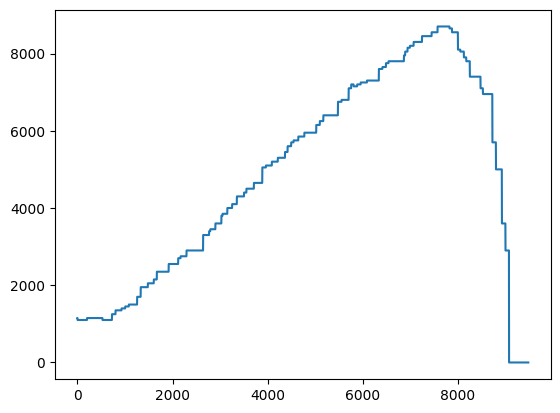

In [29]:
log_dfs['AT7215_12S_2800maH_16x14_Full']['escRPM'].plot()

In [32]:
merged_dfs: dict[str, pd.DataFrame] = dict()
peak_df = pd.DataFrame(columns=['motor', 'prop', 'battery', 'cells', 'max_thrust (g)', 'max_RPM', 'max_current', 'max_voltage', 'max_throttle'])
for run in runs:
    log_df = log_dfs[run][['loopIteration', 'escRPM', 'amperage (A)', 'vbat (V)', 'rcData[3]']]
    log_df.columns = ['loopIteration', 'escRPM', 'current', 'voltage', 'throttle']
    run_df = run_dfs[run]

    run_df['synced_iteration'] = run_df['loopIteration'] - run_df.loc[run_df['thrust (g)'].idxmax(), 'loopIteration']
    log_df['synced_iteration'] = log_df['loopIteration'] - log_df.loc[log_df['escRPM'].idxmax(), 'loopIteration']

    merged_dfs[run] = pd.merge_asof(run_df, log_df, on='synced_iteration', direction='nearest')
    peak_df = pd.concat(
        [
            peak_df,
            pd.DataFrame.from_records(
                [
                    {
                        "motor": run_df['motor'].iloc[0],
                        "prop": run_df['prop'].iloc[0],
                        "battery": run_df['battery'].iloc[0],
                        "cells": run_df['cells'].iloc[0],
                        "max_thrust (g)": run_df['thrust (g)'].max(),
                        "max_RPM": log_df['escRPM'].max(),
                        "max_current": log_df['current'].max(),
                        "max_voltage": log_df['voltage'].max(),
                        "max_throttle": log_df['throttle'].max(),
                    }
                ]
            ),
        ],
        ignore_index=True,
    )

/var/folders/gz/pp4ldsnj0tjbngm2gygkp8qc0000gn/T/ipykernel_33649/1234573942.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['synced_iteration'] = log_df['loopIteration'] - log_df.loc[log_df['escRPM'].idxmax(), 'loopIteration']
/var/folders/gz/pp4ldsnj0tjbngm2gygkp8qc0000gn/T/ipykernel_33649/1234573942.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['synced_iteration'] = log_df['loopIteration'] - log_df.loc[log_df['escRPM'].idxmax(), 'loopIteration']
/var/folders/gz/pp4ldsnj0tjbngm2gygk

In [33]:
peak_df.head()

,motor,prop,battery,cells,max_thrust (g),max_RPM,max_current,max_voltage,max_throttle
0,AT7215,15x14x3,2800maH,12S,11836.1220,8850,110.56,51.77,2011
1,AT7215,16x14,2800maH,12S,9805.9854,8700,116.84,51.95,2011
2,AT7215,16x14,2400maH,12S,9146.9912,8350,108.33,51.89,2011
3,AT7215,15x14x3,2400maH,12S,10755.5140,8550,104.86,51.90,2011


In [34]:
peak_df.to_csv(MAIN_DIR + "/peak.csv")

In [35]:
merged_dfs.keys()

dict_keys(['AT7215_12S_2800maH_15x14x3_Full', 'AT7215_12S_2800maH_16x14_Full', 'AT7215_12S_2400maH_16x14_Full', 'AT7215_12S_2400maH_15x14x3_Full'])

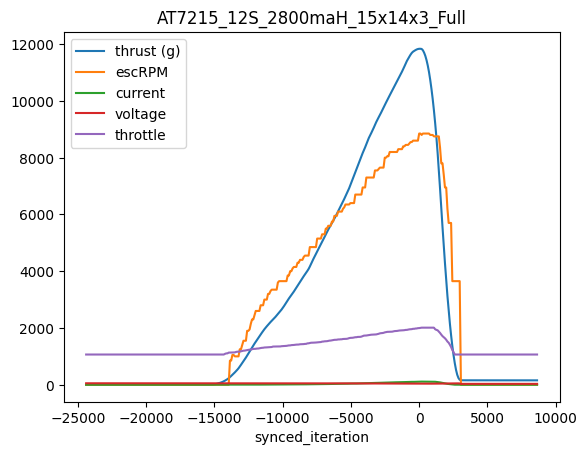

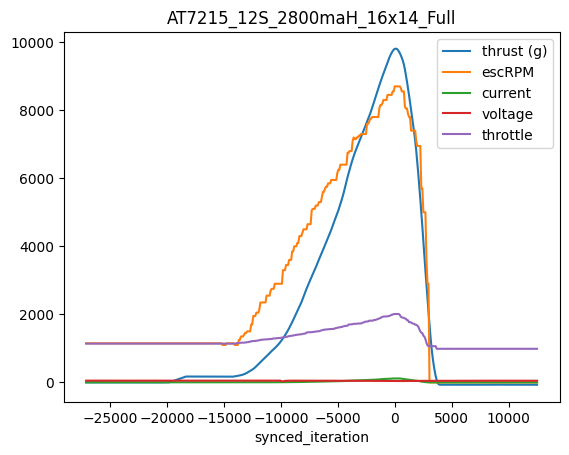

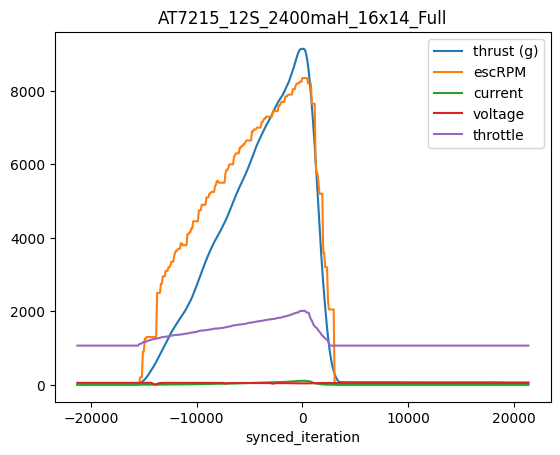

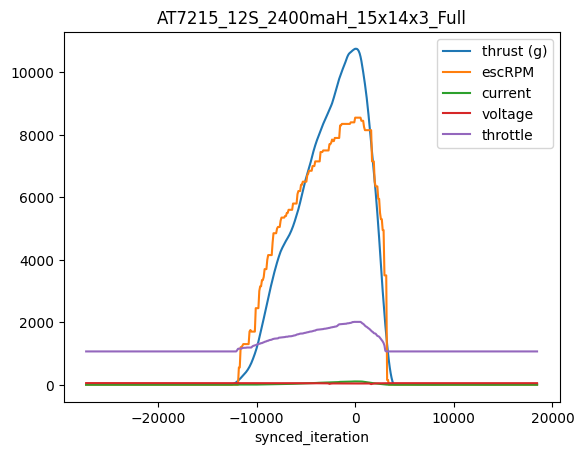

In [36]:
for run in runs:
    merged_dfs[run].plot(x='synced_iteration', y=['thrust (g)', 'escRPM', 'current', 'voltage', 'throttle'])
    plt.title(run)

In [37]:
for run in runs:
    merged_dfs[run].to_csv(f'{MAIN_DIR}/{run}.csv')

In [38]:
import plotly.express as px
pd.options.plotting.backend = "plotly"

In [39]:
for run in runs:
    fig = merged_dfs[run].plot(x='synced_iteration', y=['thrust (g)', 'escRPM', 'current', 'voltage', 'throttle'], title=run)
    fig.write_html(f'{MAIN_DIR}/{run}.html')